In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\cars.csv")

In [100]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [101]:
df.shape

(8128, 5)

In [102]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [103]:
df.duplicated().sum()

1678

In [104]:
duplicates = df[df.duplicated()]

In [105]:
duplicates

,brand,km_driven,fuel,owner,selling_price
291,Hyundai,35000,Petrol,First Owner,450000
296,Maruti,50000,Petrol,Second Owner,330000
370,Jaguar,9000,Diesel,First Owner,2625000
371,Lexus,20000,Petrol,First Owner,5150000
372,Jaguar,45000,Diesel,First Owner,3200000
...,...,...,...,...,...
8115,Maruti,120000,Petrol,First Owner,40000
8117,Maruti,50000,Diesel,First Owner,625000
8118,Hyundai,25000,Petrol,First Owner,380000
8126,Tata,25000,Diesel,First Owner,290000


In [106]:
print(duplicates.describe())

           km_driven  selling_price
count    1678.000000   1.678000e+03
mean    51947.473778   1.076634e+06
std     37679.308705   1.345665e+06
min      1000.000000   4.000000e+04
25%     20000.000000   3.500000e+05
50%     46500.000000   6.000000e+05
75%     70000.000000   8.000000e+05
max    250000.000000   6.000000e+06


In [107]:
df.drop_duplicates(inplace=True)

In [108]:
df.shape

(6450, 5)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6450 entries, 0 to 8125
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          6450 non-null   object
 1   km_driven      6450 non-null   int64 
 2   fuel           6450 non-null   object
 3   owner          6450 non-null   object
 4   selling_price  6450 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 302.3+ KB


In [110]:
round(df.describe(),2)

,km_driven,selling_price
count,6450.00,6450.00
mean,74469.01,524229.72
std,59633.41,534126.69
min,1.00,29999.00
25%,39000.00,250000.00
50%,70000.00,409999.00
75%,100000.00,640000.00
max,2360457.00,10000000.00


In [111]:
df.head(1)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000


brand
Maruti           1954
Hyundai          1176
Mahindra          648
Tata              599
Honda             354
Ford              352
Toyota            349
Chevrolet         212
Renault           192
Volkswagen        170
Nissan             73
Skoda              69
Datsun             55
Mercedes-Benz      46
BMW                46
Fiat               44
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Isuzu               4
Ambassador          4
Force               4
Kia                 3
Land                3
Daewoo              3
MG                  3
Ashok               1
Lexus               1
Opel                1
Peugeot             1
Name: count, dtype: int64

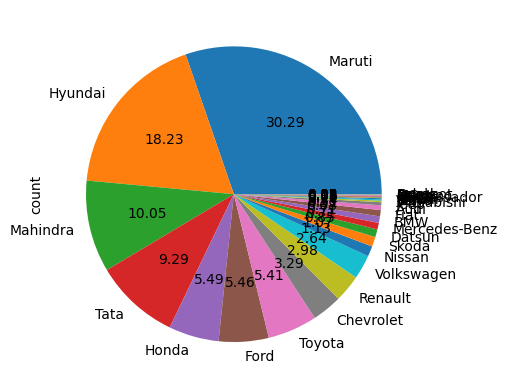

In [112]:
## Brand Share
df['brand'].value_counts().plot(kind='pie',autopct='%0.2f')
df['brand'].value_counts()

<Axes: xlabel='count', ylabel='fuel'>

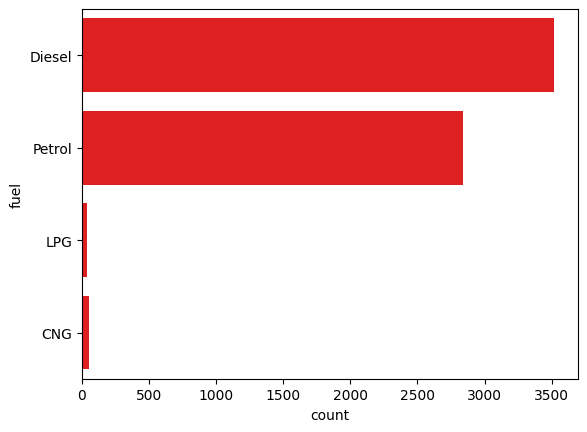

In [113]:
sns.countplot(df['fuel'],color='r')

<Axes: xlabel='count', ylabel='owner'>

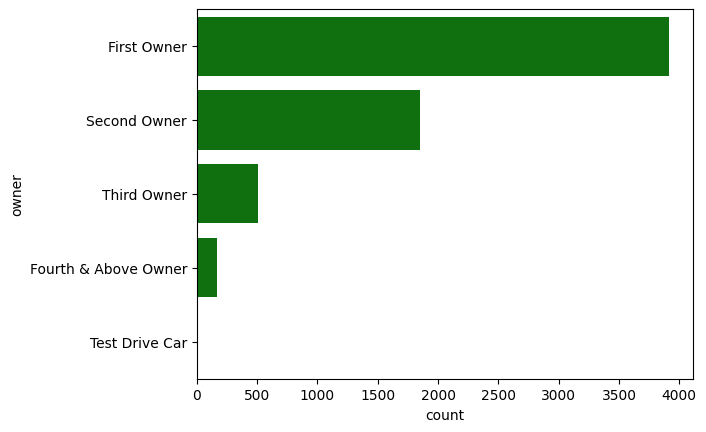

In [114]:
sns.countplot(df['owner'],color='g')

Text(0, 0.5, 'Selling Price')

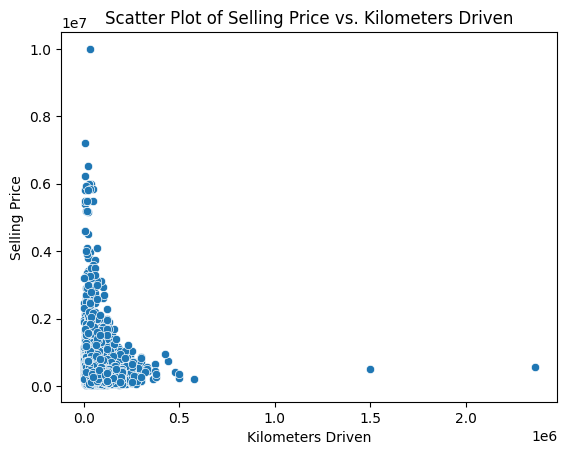

In [115]:
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.title('Scatter Plot of Selling Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')

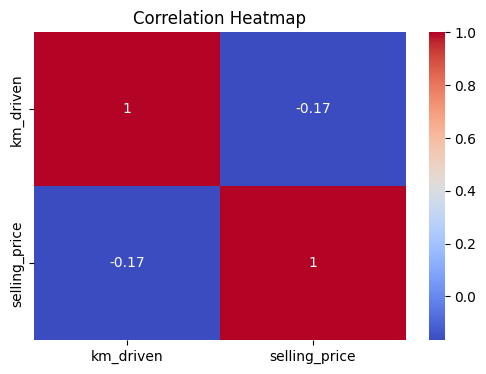

In [116]:
correlation_matrix = df[['km_driven', 'selling_price']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [117]:
# pd.get_dummies(df,columns=['fuel','owner'],dtype=int)

In [118]:
## K-1 OneHotEncoding
# pd.get_dummies(df,columns=['fuel','owner'],dtype=int,drop_first=True)

In [119]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test= train_test_split(df.drop(['selling_price'],axis=1),df['selling_price'],test_size=0.3,random_state=2)

In [122]:
X_train.shape,X_test.shape

((4515, 4), (1935, 4))

In [123]:
from sklearn.preprocessing import OneHotEncoder

In [124]:
ohe = OneHotEncoder(drop='first',dtype=int)  ##sparse=false then no need to use toarray() later

In [125]:
# ohe.fit_transform(X_train[['fuel','owner']])  ## produces sparse columns
X_train_new = ohe.fit_transform(X_train[['fuel','owner']]).toarray()

In [126]:
X_test_new = ohe.transform(X_test[['fuel','owner']]).toarray()

In [127]:
##Appending
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Honda', 50000, 0, ..., 0, 0, 0],
       ['Tata', 205000, 1, ..., 1, 0, 0],
       ['Maruti', 64500, 0, ..., 0, 0, 0],
       ...,
       ['Maruti', 60000, 1, ..., 0, 0, 0],
       ['Mahindra', 170000, 1, ..., 0, 0, 1],
       ['Maruti', 100000, 0, ..., 1, 0, 0]], dtype=object)

In [128]:
## Brand encode
counts = df['brand'].value_counts()

In [129]:
df['brand'].nunique()
threshold=100

In [130]:
repl = counts[counts <= threshold].index

In [131]:
pd.get_dummies(df['brand'].replace(repl,'uncommon'),dtype=int)

,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8121,0,0,0,0,0,1,0,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,0,0
8123,0,0,0,1,0,0,0,0,0,0,0
8124,0,0,0,1,0,0,0,0,0,0,0
